In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from matplotlib import ticker
from  matplotlib.colors import LogNorm
from math import *
import pandas as pd
from google.colab import files
import io
from scipy.interpolate import interp1d

# **Load data**

In [ ]:
beam=files.upload()

Saving beamwtnoise.csv to beamwtnoise.csv
Saving freqnoise.csv to freqnoise.csv


In [ ]:
beamwt = pd.read_csv(io.BytesIO(beam['beamwtnoise.csv']))
fresp = pd.read_csv(io.BytesIO(beam['freqnoise.csv']))
beamwt=np.array(beamwt)
fresp=np.array(fresp)

In [ ]:
fs = 700 # sampling frequency
f0 = 10 # initial frequency (Hz)
fend = 70 # final frequency (Hz)
Npoint=len(beamwt[0])
Tsimul=(Npoint-1)/fs
t=1/fs
exc_finst = np.linspace(f0, fend, Npoint) # instantaneous excitation frequency
T=np.linspace(0,t*(Npoint-1),Npoint)


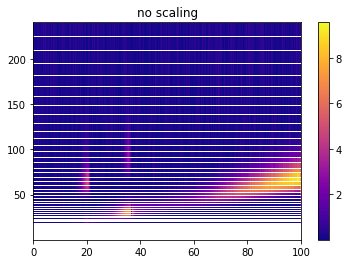

In [ ]:
plt.pcolormesh(T,fresp,beamwt,cmap="plasma", linewidth=0,rasterized=True)
plt.title("no scaling")
plt.colorbar()

# **Test and illustrate rescaling of frequencies**

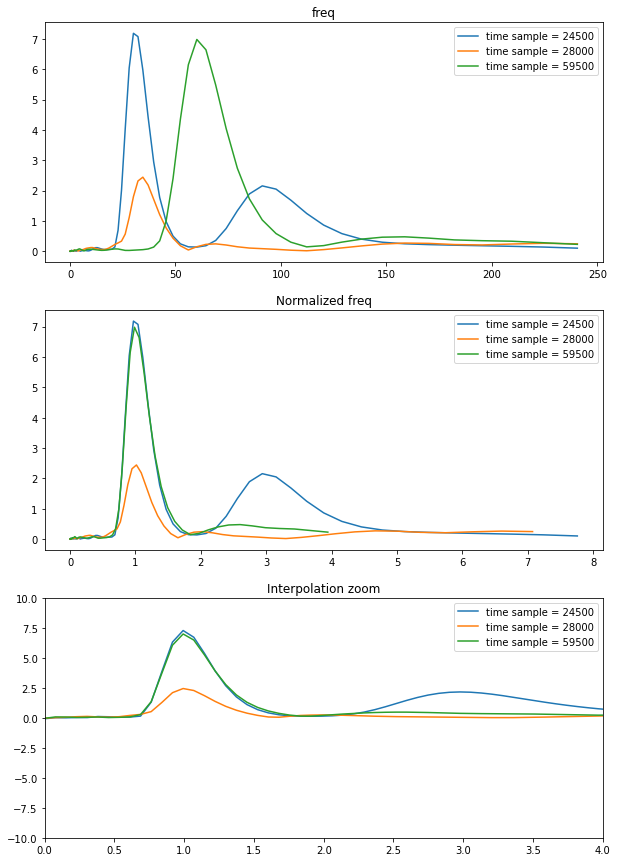

In [ ]:
idx=[35*fs,40*fs,85*fs]
fnorm = np.linspace(0, 10, len(fresp)) # Vector of frequency ratios



fig, ax = plt.subplots(3,figsize=(10, 15))
ax[0].set_title('freq')
ax[1].set_title('Normalized freq')
ax[2].set_title('Interpolation zoom')

for i in range(len(idx)):
  # Display amplitude of the WT at choose time instants - x-axis is the row number
  ax[0].plot(fresp, beamwt[:,idx[i]], label='time sample = '+str(idx[i])) 
  ax[0].legend(loc='best')

  # Display amplitude of the WT at choose time instants - x-axis is normalised frequency
  fexc = exc_finst[idx[i]] # excitation frequency at time instant
  fscaled = (fresp/fexc).reshape(len(fresp))   # scale the response frequency vector by excitation frequency
  ax[1].plot(fscaled,beamwt[:,idx[i]], label='time sample = '+str(idx[i]))
  ax[1].legend(loc='best')

  # Interpolate scale frequency vector such that a given frequency ratio always appear at the same element in the column vector
  scaling = interp1d(fscaled, beamwt[:,idx[i]], kind='cubic', fill_value="extrapolate")
  wt_amp_mapped = scaling(fnorm)
  ax[2].plot(fnorm,wt_amp_mapped, label='time sample = '+str(idx[i]))  # This figures shows that now all the curves align when the x-axis is the row number
  ax[2].legend(loc='best')
  ax[2].set_xlim(0,4)
  ax[2].set_ylim(-10,10)
  


(-10.0, 10.0)

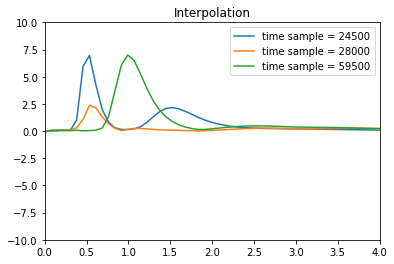

In [ ]:
plt.title('Interpolation')

for i in range(len(idx)):
  scaling = interp1d(fscaled, beamwt[:,idx[i]], kind='cubic', fill_value="extrapolate")
  wt_amp_mapped = scaling(fnorm)
  plt.plot(fnorm,wt_amp_mapped, label='time sample = '+str(idx[i]))  # This figures shows that now all the curves align when the x-axis is the row number
  plt.legend(loc='best')
plt.xlim(0,4)
plt.ylim(-10,10)


# **Rescale the output of the wavelet transform with respect to excitation frequency.**

In [ ]:
np.shape(beamwt)

(132, 70001)

In [ ]:
# Apply previous scaling to the entire wavelet amplitude
wt_amp_scaled = np.zeros(np.shape(beamwt))
for i in range(Npoint):
  fscaled = (fresp/exc_finst[i]).reshape(len(beamwt))
  scaling = interp1d(fscaled, beamwt[:,i], kind='linear', fill_value="extrapolate")
  wt_amp_scaled[:,i]=scaling(fnorm)

Text(0.5, 1.0, 'distribution of frequency')

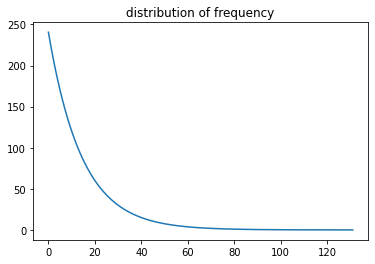

In [ ]:
U=np.linspace(0,len(fresp)-1,len(fresp))
plt.plot(U,fresp.reshape(len(fresp)))
plt.title('distribution of frequency')

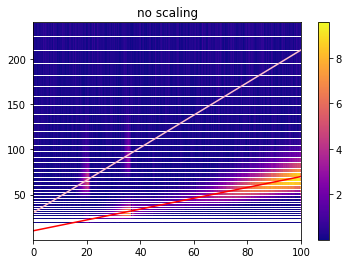

In [ ]:
plt.pcolormesh(T,fresp,beamwt,cmap="plasma")
plt.title("no scaling")
plt.colorbar()
#plt.pcolormesh(T,freq,sweepwt,cmap="plasma")
plt.plot(T,exc_finst, color='red')
plt.plot(T,3*exc_finst, color='pink')

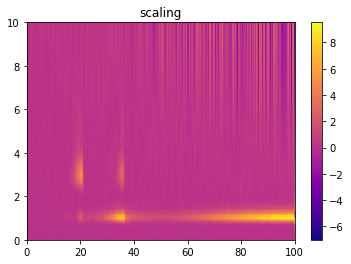

In [ ]:
plt.pcolormesh(T,fnorm,wt_amp_scaled,cmap="plasma")
plt.title("scaling")
#plt.ylim(0,5)
plt.colorbar()



# **Save the prescaled wavelet tranform.**

In [ ]:
from google.colab import files
wt_amp_scaled.tofile('sc_noise_beam.csv', sep = ',')
files.download('sc_noise_beam.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>